In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Logit/sigmoid function

Logistic regression is a baseline supervised algorithm for solving classification problem where outcome (target) is discrete.   The idea behind is that $\boldsymbol{\theta}^T\mathbf{x}$ will return a continous value and thus may not be suitable for classification task.  However, if we can find one function $g$ such that

$$g(\boldsymbol{\theta}^T\mathbf{x}) \in \{0, 1\}$$

then we can define our hypothesis function as $g$ and optimize accordingly based on some loss function.

It happens that $g$ (and also our hypothesis function h) can be defined as the sigmoid (logit) function as the following:

$$ h = g(\boldsymbol{\theta}^T\mathbf{x}) = \frac{1}{1+e^{-\boldsymbol{\theta}^T\mathbf{x}}} $$

**Note:  e is also known as the Euler's number**

**Note: don't worry if you don't know what is a sigmoid function.  It is just some function that magically maps any value to value between 0 to 1.**

**Trivials**: 
$e$ is a really convenient number for math, for example whenever you take the derivative of $e^x$, you get $e^x$ back again.  It's the only function on Earth that will do that.  Also, $e^x$ always give you positive numbers, thus it is no surprise this $e$ was often used in probability/statistics.  Last, it is convenient to apply $\log$ in any optimization problem including $e$ since it will cancel it nicely and will also not change the optimization answer since $\log$ is monotically increasing.  Btw, the common log base we use in natural log, but it really does not matter because the base is merely a constant.

Let's see how does it look in code:

In [3]:
def sigmoid(x, derivative=False):
    prob = 1 / ( 1 + np.exp(-x))
    
    if derivative:
        d_sigmoid = prob * (1 - prob)
        return d_sigmoid
    return prob
        

Hmm...but the range of output is a continuous value between 0 and 1.  Well, we can simply round up/down to get either 0 or 1.

## Derivative

Recall the derivative using quotient rule is        

$$ (\frac{f}{g})' = \frac{f'g - fg'}{g^2}$$

Given sigmoid function as

$$ g(x) = \frac{1}{1+e^{-x}} $$

Thus the derivative of sigmoid function is

$$
\begin{aligned}
    \frac{dg}{dx} &= \frac{0(1 + e^{-x}) - (-1)(e^{-x}))}{(1 + e^{-x})^2} \\
    &= \frac{e^{-x}}{(1 + e^{-x})^2}  = \frac{e^{-x} + 1 - 1}{(1 + e^{-x})^2} \\
    &= \frac{1}{(1 + e^{-x})} - \frac{1}{(1 + e^{-x})^2} \\
    &= \frac{1}{(1 + e^{-x})} \big(1 - \frac{1}{(1 + e^{-x})}\big)\\
    &= g(1 - g)
\end{aligned}
$$

**Note: once again, don't worry if you don't understand derivative very well.  The key here is just to be reminded that derivative is important for us to do gradient descent, ok?**

Let's look at the gradient by modifying our sigmoid function a little bit.

Max value of Derivative of sigmoid is : 0.25 at x = 0


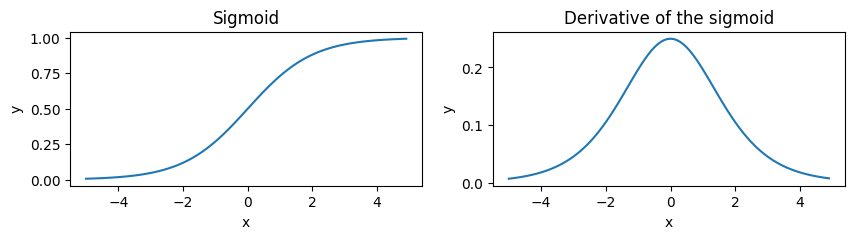

In [4]:
# Generate data points
x = np.arange(-5,5,0.1)
y = sigmoid(x)
y_deriv = sigmoid(x, derivative=True)

# Plot the sigmoid
_, ax = plt.subplots(1, 2, figsize=(10, 2))
ax1 = ax[0]
ax1.plot(x, y)
ax1.set_title('Sigmoid')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot the derivative of the sigmoid
ax2 = ax[1]
ax2.plot(x, y_deriv)
ax2.set_title('Derivative of the sigmoid')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

print(f"Max value of Derivative of sigmoid is : 0.25 at x = 0")

In [7]:
def z_calculate(X, W):
    print(X.shape, W.shape)
    return X @ W

def predict(X, W, threshold):
    logit = z_calculate(X, W)
    prob = sigmoid(logit)
    return np.where(logit > threshold, 1, 0)

In [6]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, batch_size=32):

        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.weights = None
        self.losses = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _h_theta(self, X):
        #Computes the hypothesis function (logistic regression output).

        return self._sigmoid(np.dot(X, self.weights))
    
    def _compute_loss_and_gradient(self, X, y):
        m = X.shape[0]
        h = self._h_theta(X)
        loss = - np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, (h - y)) / m
        return loss, grad
    
    def fit(self, X, y):
        # Trains the logistic regression model using mini-batch gradient descent.
        
        m, n = X.shape
        self.weights = np.zeros(n)

        for i in range(self.max_iter):
            # Randomly shuffle the data
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Create mini-batches
            for start in range(0, m, self.batch_size):
                end = start + self.batch_size
                batch_X = X_shuffled[start:end]
                batch_y = y_shuffled[start:end]
                loss, grad = self._compute_loss_and_gradient(batch_X, batch_y)
                self.weights -= self.learning_rate * grad

            if i % 100 == 0:
                self.losses.append(loss)
                print(f"Loss at iteration {i}: {loss:.4f}")

        return self
    
    def predict_proba(self, X):
        # Predicts the probability estimates for each sample.
        
        return self._h_theta(X)
    
    def predict(self, X):
        #Predicts binary labels for each sample.
        return np.round(self.predict_proba(X))

Example usage:
model = LogisticRegression(learning_rate=0.01, max_iter=5000, batch_size=32)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
